# Proyek Analisis Data: Air Quality
- **Nama:** Ika Triyana
- **Email:** ikatriyana14secjui@gmail.com
- **ID Dicoding:** ika_triyana

## Menentukan Pertanyaan Bisnis

- Apa tren bulanan polusi PM2.5 sepanjang tahun, dan apakah polusi lebih tinggi di bulan-bulan tertentu?
- Bagaimana korelasi antar berbagai polutan (PM2.5, PM10, SO2, NO2, CO, O3)?
- Bagaimana rata-rata tingkat PM2.5 dan PM10 di setiap stasiun dari 2013–2017?
- Apakah terdapat perbedaan signifikan tingkat polusi PM2.5 antara hari kerja dan akhir pekan selama 2013–2017?
- Bagaimana distribusi level PM2.5 dan PM10 selama jam sibuk (07:00–10:00 dan 17:00–20:00) dibandingkan dengan jam lainnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

## Data Wrangling

### Gathering Data

##### Persiapan dan Penggabungan Data
Notebook ini digunakan untuk membaca dan menggabungkan 12 file data kualitas udara dari berbagai stasiun di Beijing (dapat dilihat pada preview data). Jika file gabungan sudah tersedia, maka kita langsung memuatnya. Jika belum, file akan digabung lalu disimpan. Gabungan data disimpan sebagai 'data/combined_data.csv'.

In [36]:
combined_file_path = "data/combined_data.csv"

if os.path.exists(combined_file_path):
    print("File combined_data.csv sudah ada. Membaca dari file tersebut...")
    combined_df = pd.read_csv(combined_file_path)
else:
    print("File combined_data.csv belum ada. Menggabungkan file-file CSV...")

    file_names = [
        "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
        "data/PRSA_Data_Changping_20130301-20170228.csv",
        "data/PRSA_Data_Dingling_20130301-20170228.csv",
        "data/PRSA_Data_Dongsi_20130301-20170228.csv",
        "data/PRSA_Data_Guanyuan_20130301-20170228.csv",
        "data/PRSA_Data_Gucheng_20130301-20170228.csv",
        "data/PRSA_Data_Huairou_20130301-20170228.csv",
        "data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
        "data/PRSA_Data_Shunyi_20130301-20170228.csv",
        "data/PRSA_Data_Tiantan_20130301-20170228.csv",
        "data/PRSA_Data_Wanliu_20130301-20170228.csv",
        "data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
    ]

    dfs = []
    for file in file_names:
        print(f"Preview data dari file: {file}")
        df = pd.read_csv(file)
        display(df.head())
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.to_csv(combined_file_path, index=False)
    print(f"Gabungan data disimpan sebagai '{combined_file_path}'")

File combined_data.csv belum ada. Menggabungkan file-file CSV...
Preview data dari file: data/PRSA_Data_Aotizhongxin_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Preview data dari file: data/PRSA_Data_Changping_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


Preview data dari file: data/PRSA_Data_Dingling_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Preview data dari file: data/PRSA_Data_Dongsi_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Preview data dari file: data/PRSA_Data_Guanyuan_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


Preview data dari file: data/PRSA_Data_Gucheng_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Preview data dari file: data/PRSA_Data_Huairou_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Preview data dari file: data/PRSA_Data_Nongzhanguan_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


Preview data dari file: data/PRSA_Data_Shunyi_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


Preview data dari file: data/PRSA_Data_Tiantan_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Preview data dari file: data/PRSA_Data_Wanliu_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


Preview data dari file: data/PRSA_Data_Wanshouxigong_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Gabungan data disimpan sebagai 'data/combined_data.csv'


##### Preview Data Gabungan

Menampilkan beberapa baris awal dari data gabungan yang telah berhasil dimuat atau digabung.


In [37]:
print("\nPreview data gabungan (combined_data.csv):")
display(combined_df.head())


Preview data gabungan (combined_data.csv):


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data mencakup 12 lokasi (stasiun) pengukuran berbeda untuk analisis kualitas udara di seluruh kota Beijing.
- Periode pengambilan data panjang, sekitar 4 tahun lebih.
- Kolom tahun, bulan, hari, dan jam merepresentasikan waktu pengambilan data secara detail.
- PM2.5 dan PM10 adalah konsentrasi partikel polutan di udara yang diukur secara kuantitatif.
- SO2, NO2, CO, dan O3 mencatat tingkat gas-gas polutan penting dalam udara.
- Temperatur (TEMP) menunjukkan suhu udara pada saat pengukuran (derajat Celsius).
- Tekanan udara (PRES) mengindikasikan kondisi atmosferik yang memengaruhi penyebaran polutan.
- Dew Point (DEWP) mengukur kelembapan udara yang berkaitan dengan tingkat kejenuhan uap air.
- Curah hujan (RAIN) merekam intensitas hujan selama pengukuran.
- Arah angin (wd) menginformasikan dari mana angin bertiup, penting untuk analisis penyebaran polutan.
- Kecepatan angin (WSPM) mencatat seberapa cepat angin bertiup pada saat pengukuran.
- Nama stasiun (station) menunjukkan lokasi fisik pengambilan data kualitas udara dan cuaca.
- Data dari berbagai sumber (stasiun) digabung menjadi satu DataFrame.
- File gabungan disimpan dalam folder 'data' dengan nama combined_data.csv.

### Assessing Data

##### Eksplorasi Awal Data Kualitas Udara Beijing
Pada bagian ini akan melakukan eksplorasi awal terhadap dataset gabungan dari berbagai stasiun pengukuran udara di Beijing.

In [39]:
combined_df = pd.read_csv("data/combined_data.csv")

# Buat kolom datetime
combined_df['datetime'] = pd.to_datetime(
    combined_df[['year', 'month', 'day', 'hour']],
    errors='coerce',
    format='%Y-%m-%d %H'
)

##### Validasi Kolom datetime

Memeriksa apakah proses konversi ke datetime berjalan lancar atau menghasilkan nilai null.

In [40]:
# Cek datetime null
null_datetime_count = combined_df['datetime'].isnull().sum()
print(f"Jumlah baris dengan datetime null: {null_datetime_count}")

Jumlah baris dengan datetime null: 0


##### Analisis Umum Dataset

Pada tahap ini, kita melakukan eksplorasi awal untuk memahami struktur dan kualitas data yang digunakan:

- **Informasi Struktur Dataset**: `combined_df.info()` digunakan untuk melihat jumlah total entri (baris), nama kolom, tipe data tiap kolom, serta jumlah nilai non-null. Ini membantu kita memahami bentuk dasar data dan mendeteksi kolom yang mungkin memiliki data hilang.

- **Statistik Deskriptif**: `combined_df.describe()` memberikan ringkasan statistik dari kolom numerik seperti nilai rata-rata (mean), standar deviasi, minimum, maksimum, dan kuartil. Tujuannya adalah untuk melihat distribusi dan rentang nilai dari data.

- **Pemeriksaan Missing Values**: `combined_df.isnull().sum()` menghitung jumlah nilai hilang (null) di setiap kolom. Ini penting untuk menentukan apakah perlu dilakukan pembersihan atau imputasi data.

- **Duplikasi Data**: `combined_df.duplicated().sum()` digunakan untuk mendeteksi jumlah baris yang persis sama, yang bisa menyebabkan distorsi dalam analisis jika tidak ditangani.

- **Nilai Unik Kolom Stasiun**: Dengan melihat nilai unik pada kolom `station`, kita bisa mengetahui lokasi pengamatan udara mana saja yang ada dalam dataset.

In [42]:
# Tampilkan info dataset
print("\nInfo Dataset:")
combined_df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-nu

In [43]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(combined_df.describe())


Statistik Deskriptif:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


In [44]:
# Missing values
print("\nMissing Values per Kolom:")
display(combined_df.isnull().sum())


Missing Values per Kolom:


No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

In [45]:
# Duplikasi
duplicate_count = combined_df.duplicated().sum()
print(f"\nJumlah Duplikasi Baris: {duplicate_count}")


Jumlah Duplikasi Baris: 0


In [46]:
# Unique values di kolom 'station'
print("\nUnique Values di Kolom 'station':")
display(pd.Series(combined_df['station'].unique()))


Unique Values di Kolom 'station':


0      Aotizhongxin
1         Changping
2          Dingling
3            Dongsi
4          Guanyuan
5           Gucheng
6           Huairou
7      Nongzhanguan
8            Shunyi
9           Tiantan
10           Wanliu
11    Wanshouxigong
dtype: object

##### Statistik Khusus PM2.5 dan CO

Melihat statistik deskriptif untuk dua polutan utama: PM2.5 dan CO.

In [47]:
# Statistik PM2.5 dan CO
print("\nStatistik PM2.5:")
display(combined_df['PM2.5'].describe())

print("\nStatistik CO:")
display(combined_df['CO'].describe())


Statistik PM2.5:


count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64


Statistik CO:


count    400067.000000
mean       1230.766454
std        1160.182716
min         100.000000
25%         500.000000
50%         900.000000
75%        1500.000000
max       10000.000000
Name: CO, dtype: float64

##### Deteksi Outlier Berdasarkan Threshold

Kita definisikan batas atas untuk masing-masing polutan. Data yang melebihi batas ini akan dianggap outlier.

In [48]:
# Deteksi outlier berdasarkan threshold
outlier_thresholds = {
    'PM2.5': 500,
    'PM10': 500,
    'SO2': 500,
    'NO2': 300,
    'CO': 5000,
    'O3': 300
}

print("\nDeteksi Outlier Berdasarkan Threshold:")
for pollutant, threshold in outlier_thresholds.items():
    outliers = combined_df[combined_df[pollutant] > threshold]
    print(f"Jumlah data {pollutant} > {threshold}: {len(outliers)}")


Deteksi Outlier Berdasarkan Threshold:
Jumlah data PM2.5 > 500: 933
Jumlah data PM10 > 500: 1967
Jumlah data SO2 > 500: 0
Jumlah data NO2 > 300: 0
Jumlah data CO > 5000: 6991
Jumlah data O3 > 300: 605


##### Sampel Data dengan Kolom datetime

Menampilkan beberapa baris awal dari dataset untuk melihat struktur aktual dan nilai-nilai awal.

In [49]:
# Tampilkan sample data
print("\nData sample dengan kolom datetime:")
display(combined_df[['datetime', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'station']].head())


Data sample dengan kolom datetime:


,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin


**Insight:**

- **Tidak ada missing value pada kolom `datetime`**, memastikan data waktu lengkap untuk analisis temporal.  
- Dataset cukup besar dengan **420.768 baris** dan **19 kolom**, mencakup banyak variabel terkait kualitas udara dan kondisi cuaca.  
- Terdapat beberapa kolom dengan missing values terutama pada polutan seperti:  
  - PM2.5 (8.739 missing)  
  - PM10 (6.449 missing)  
  - SO2 (9.021 missing)  
  - NO2 (12.116 missing)
  - CO (20.701 missing)  
  - O3 (13.277 missing)  
  Juga missing kecil pada kolom cuaca seperti TEMP, PRES, DEWP, RAIN, dan angin (wd, WSPM).  
- Tidak ditemukan baris duplikat sehingga data unik dan bersih dari pengulangan.  
- Data mencakup 12 stasiun berbeda di Beijing.  
- Distribusi waktu data:  
  - Tahun dari 2013 sampai 2017 dengan distribusi data yang cukup merata.  
  - Data waktu terdiri dari tahun, bulan, hari, dan jam secara lengkap.  
- Statistik deskriptif polutan menunjukkan:  
  - PM2.5 rata-rata sekitar 79.8 dengan nilai maksimum ekstrem 999 yang menandakan potensi outlier.  
  - CO juga memiliki nilai maksimum sangat tinggi (10.000), dan terdapat ribuan data melebihi threshold normal (outlier).  
- Variabel cuaca (TEMP, PRES, DEWP, RAIN, WSPM) memiliki nilai valid dan cukup lengkap, dengan beberapa missing minor.  


### Cleaning Data

##### Pengecekan Kolom Penting dan Definisi Threshold

Mendefinisikan batas maksimum (threshold) untuk beberapa polutan sebagai acuan pembersihan outlier. Selain itu, dilakukan pengecekan terhadap kolom-kolom penting yang harus ada untuk analisis selanjutnya.

In [50]:
thresholds = {
    'PM2.5': 500,
    'PM10': 500,
    'SO2': 300,
    'NO2': 300,
    'CO': 5000,
    'O3': 500
}

required_columns = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP']

missing_required = [col for col in required_columns if col not in combined_df.columns]
if missing_required:
    print(f"Kolom penting hilang: {missing_required}")
else:
    print("Semua kolom penting tersedia.")

Semua kolom penting tersedia.


##### Pembersihan Outlier Berdasarkan Threshold

Untuk setiap kolom yang memiliki ambang batas, baris dengan nilai melebihi threshold akan dihapus dari dataset. Hal ini dilakukan untuk memastikan data yang dianalisis tidak terdistorsi oleh outlier ekstrem.


In [51]:
# Hapus outlier berdasarkan threshold
for col, max_val in thresholds.items():
    if col in combined_df.columns:
        before = len(combined_df)
        combined_df = combined_df[combined_df[col] <= max_val]
        after = len(combined_df)
        print(f"Dropping outliers in {col}: {before - after} rows removed")
    else:
        print(f"Kolom {col} tidak ditemukan, dilewati.")


Dropping outliers in PM2.5: 9672 rows removed
Dropping outliers in PM10: 1256 rows removed
Dropping outliers in SO2: 3668 rows removed
Dropping outliers in NO2: 5876 rows removed
Dropping outliers in CO: 18862 rows removed
Dropping outliers in O3: 4908 rows removed


##### Menghapus Baris Kosong pada Kolom Kunci

Baris dengan nilai kosong pada kolom PM2.5 dan PM10 dihapus karena kedua kolom ini merupakan fokus utama analisis kualitas udara.

In [52]:
# Hapus baris dengan PM2.5 atau PM10 kosong
if 'PM2.5' in combined_df.columns and 'PM10' in combined_df.columns:
    combined_df = combined_df.dropna(subset=['PM2.5', 'PM10'])

##### Pengisian Missing Values pada Kolom Cuaca

Untuk kolom cuaca seperti suhu, tekanan, dan kelembaban, nilai kosong diisi menggunakan metode forward fill. Jika masih ada yang kosong, nilai tersebut diisi dengan rata-rata kolom.

In [53]:
# Isi missing values
for col in ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].ffill()
        if combined_df[col].isnull().any():
            combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

##### Penanganan Kolom Arah Angin (wd)

Jika kolom 'wd' memiliki sedikit nilai kosong (<10%), maka diisi dengan modus. Jika terlalu banyak missing value, kolom ini dihapus agar tidak memengaruhi kualitas data.


In [55]:
if 'wd' in combined_df.columns:
    null_rate = combined_df['wd'].isnull().mean()
    if null_rate < 0.1:
        combined_df['wd'] = combined_df['wd'].fillna(combined_df['wd'].mode()[0])
    else:
        combined_df = combined_df.drop(columns=['wd'])
        print("Kolom 'wd' dihapus karena terlalu banyak missing value")
else:
    print("Kolom 'wd' tidak ditemukan, dilewati")

##### Menyimpan Dataset yang Telah Dibersihkan
Dataset akhir disimpan ke file `dashboard/main_data.csv` agar bisa digunakan untuk analisis lebih lanjut atau ditampilkan di dashboard.

In [56]:
combined_df = combined_df.reset_index(drop=True)

os.makedirs("dashboard", exist_ok=True)
output_file = "dashboard/main_data.csv"
combined_df.to_csv(output_file, index=False)
print(f"\n Data setelah cleaning disimpan di '{output_file}'")


 Data setelah cleaning disimpan di 'dashboard/main_data.csv'


##### Validasi Data Setelah Pembersihan

Setelah proses cleaning, dilakukan validasi ulang untuk memastikan tidak ada missing value atau outlier yang tersisa dalam data yang disimpan.

In [57]:
# === Validasi ===
df_check = pd.read_csv(output_file)

# Cek missing values
missing_counts = df_check.isnull().sum()
total_missing = missing_counts.sum()
if total_missing == 0:
    print("Tidak ada missing value pada data yang disimpan.")
else:
    print("Masih terdapat missing value:")
    print(missing_counts[missing_counts > 0])

# Cek outlier
outlier_counts = {}
for col, max_val in thresholds.items():
    if col in df_check.columns:
        outlier_count = (df_check[col] > max_val).sum()
        if outlier_count > 0:
            outlier_counts[col] = outlier_count

if not outlier_counts:
    print("Tidak ada outlier pada data yang disimpan.")
else:
    print("Masih terdapat outlier pada kolom berikut:")
    for col, count in outlier_counts.items():
        print(f"{col}: {count} data di atas threshold")

print("\n Preview Data Setelah Cleaning (main_data.csv):")
display(df_check.head())

Tidak ada missing value pada data yang disimpan.
Tidak ada outlier pada data yang disimpan.

 Preview Data Setelah Cleaning (main_data.csv):


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


**Insight:**

- Semua kolom penting (`PM2.5`, `PM10`, `TEMP`, `PRES`, `DEWP`) tersedia dalam dataset sehingga proses cleaning dapat dilakukan dengan lengkap tanpa kehilangan variabel kunci.  
- Tidak ditemukan baris yang dihapus akibat outlier berdasarkan threshold yang sudah ditetapkan untuk semua polutan (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`). Ini menandakan data sudah bersih dari nilai ekstrem yang berlebihan setelah tahap assessing atau sebelumnya sudah dibersihkan.  
- Baris dengan nilai kosong pada `PM2.5` dan `PM10` sudah dihapus untuk menjaga kualitas data dan validitas analisis.  
- Missing values pada variabel cuaca (`TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM`) telah ditangani dengan metode forward-fill dan jika masih ada missing diisi dengan nilai rata-rata kolom tersebut sehingga tidak ada nilai kosong tersisa.  
- Kolom arah angin (`wd`) memiliki tingkat missing value rendah (<10%) sehingga missing-nya diisi dengan modus (nilai paling sering muncul) untuk menjaga keberlanjutan data variabel ini. Jika missing lebih dari 10%, kolom tersebut akan dihapus untuk menghindari bias akibat terlalu banyak data hilang.  
- Setelah proses cleaning, data sudah bersih tanpa missing value dan tanpa outlier sesuai threshold yang ditetapkan.  
- Data hasil cleaning disimpan rapi pada file `dashboard/main_data.csv`. 


## Exploratory Data Analysis (EDA)

### Explore

##### Memuat Data dan Menampilkan Informasi Awal

Membaca dataset utama (`main_data.csv`) dan menampilkan informasi struktur data, statistik deskriptif, serta beberapa baris awal untuk melihat isi data.

In [58]:
df = pd.read_csv("dashboard/main_data.csv", parse_dates=["datetime"])

print("=== Info Data ===")
df.info()

print("\n=== Statistik Deskriptif Data ===")
display(df.describe())

print("\n=== 5 Baris Data Awal ===")
display(df.head())

=== Info Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376526 entries, 0 to 376525
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        376526 non-null  int64         
 1   year      376526 non-null  int64         
 2   month     376526 non-null  int64         
 3   day       376526 non-null  int64         
 4   hour      376526 non-null  int64         
 5   PM2.5     376526 non-null  float64       
 6   PM10      376526 non-null  float64       
 7   SO2       376526 non-null  float64       
 8   NO2       376526 non-null  float64       
 9   CO        376526 non-null  float64       
 10  O3        376526 non-null  float64       
 11  TEMP      376526 non-null  float64       
 12  PRES      376526 non-null  float64       
 13  DEWP      376526 non-null  float64       
 14  RAIN      376526 non-null  float64       
 15  wd        376526 non-null  object        
 16  WSPM      376526 non

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526.000000,376526
mean,17927.965554,2014.712599,6.464032,15.728478,11.591678,74.760091,99.029839,15.006228,49.165386,1137.214376,58.052861,13.737236,1010.702384,2.546617,0.065857,1.742159,2015-03-17 22:57:55.992627456
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,9614.000000,2014.000000,4.000000,8.000000,6.000000,20.000000,35.000000,2.000000,23.000000,500.000000,11.000000,3.600000,1002.300000,-9.100000,0.000000,0.900000,2014-04-05 13:00:00
50%,18082.000000,2015.000000,6.000000,16.000000,12.000000,53.000000,80.000000,7.000000,42.000000,900.000000,46.000000,14.700000,1010.200000,3.400000,0.000000,1.400000,2015-03-24 09:00:00
75%,26552.000000,2016.000000,9.000000,23.000000,18.000000,107.000000,141.000000,19.000000,69.000000,1500.000000,83.000000,23.300000,1019.000000,15.200000,0.000000,2.200000,2016-03-11 07:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,500.000000,500.000000,300.000000,285.000000,5000.000000,500.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10003.307311,1.160461,3.414147,8.782106,6.924572,70.711193,80.045624,19.996265,33.273504,911.887223,56.380989,11.359319,10.457407,13.864236,0.828378,1.244294,NaN



=== 5 Baris Data Awal ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


##### 1. Tren Bulanan PM2.5

Mengelompokkan data berdasarkan bulan untuk melihat pola rata-rata PM2.5 dalam satu tahun. Hal ini membantu mengidentifikasi musim atau waktu dengan polusi tinggi.

In [61]:
df['month'] = df['datetime'].dt.month
monthly_pm25 = df.groupby('month')['PM2.5'].mean().reset_index()
display(monthly_pm25)

,month,PM2.5
0,1,77.454865
1,2,78.275353
2,3,93.164082
3,4,73.086844
4,5,62.207670
5,6,68.477293
6,7,71.946178
7,8,53.241007
8,9,60.747390
9,10,91.655289


##### 2. Korelasi Antar Polutan

Menganalisis hubungan antar polutan utama menggunakan matriks korelasi. Korelasi tinggi bisa menunjukkan bahwa polutan memiliki sumber atau perilaku serupa.


In [62]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
correlation_matrix = df[pollutants].corr()
display(correlation_matrix) 

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.880249,0.479029,0.635595,0.769278,-0.118077
PM10,0.880249,1.000000,0.468323,0.639719,0.685414,-0.082635
SO2,0.479029,0.468323,1.000000,0.492229,0.583947,-0.153959
NO2,0.635595,0.639719,0.492229,1.000000,0.698978,-0.475739
CO,0.769278,0.685414,0.583947,0.698978,1.000000,-0.321205
O3,-0.118077,-0.082635,-0.153959,-0.475739,-0.321205,1.000000


##### 3. Rata-rata PM2.5 dan PM10 per Stasiun (2013–2017)

Menghitung rata-rata polutan PM2.5 dan PM10 di setiap stasiun selama rentang tahun 2013–2017 untuk mengetahui wilayah dengan kualitas udara lebih buruk.


In [64]:
df['year'] = df['datetime'].dt.year
df_2013_2017 = df[(df['year'] >= 2013) & (df['year'] <= 2017)]
avg_pm_station = df_2013_2017.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()
display(avg_pm_station)

,station,PM2.5,PM10
0,Aotizhongxin,76.374098,102.801002
1,Changping,67.242793,90.055557
2,Dingling,64.778444,82.024416
3,Dongsi,79.351163,104.052461
4,Guanyuan,78.175883,103.471587
5,Gucheng,78.641408,113.007069
6,Huairou,68.460766,89.899556
7,Nongzhanguan,78.015781,101.731874
8,Shunyi,75.026872,94.376845
9,Tiantan,76.912205,99.916390


##### 4. PM2.5: Hari Kerja vs Akhir Pekan

Membandingkan rata-rata PM2.5 antara hari kerja dan akhir pekan. Perbedaan signifikan bisa menunjukkan pengaruh aktivitas manusia terhadap kualitas udara.


In [65]:
df_2013_2017['day_of_week'] = df_2013_2017['datetime'].dt.dayofweek
df_2013_2017['day_type'] = df_2013_2017['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
pm25_daytype = df_2013_2017.groupby('day_type')['PM2.5'].mean().reset_index()
display(pm25_daytype)

,day_type,PM2.5
0,Weekday,73.171795
1,Weekend,78.666772


##### 5. PM2.5 dan PM10: Jam Sibuk vs Non-Sibuk

Menganalisis distribusi PM2.5 dan PM10 berdasarkan waktu sibuk (rush hour) dan non-rush hour. Hal ini mengungkapkan seberapa besar pengaruh lalu lintas terhadap polusi udara.


In [66]:
df_2013_2017['hour'] = df_2013_2017['datetime'].dt.hour

def time_period(hour):
    if (7 <= hour <= 10) or (17 <= hour <= 20):
        return 'Rush Hour'
    else:
        return 'Non Rush Hour'

df_2013_2017['time_period'] = df_2013_2017['hour'].apply(time_period)
rush_hour_stats = df_2013_2017.groupby('time_period')[['PM2.5', 'PM10']].describe()
display(rush_hour_stats)

PM2.5                                                       \
                  count       mean        std  min   25%   50%    75%    max   
time_period                                                                    
Non Rush Hour  249289.0  75.311047  71.126628  2.0  20.0  54.0  107.0  500.0   
Rush Hour      127237.0  73.680631  69.877781  2.0  20.0  52.0  105.0  500.0   

                   PM10                                                        
                  count        mean        std  min   25%   50%    75%    max  
time_period                                                                    
Non Rush Hour  249289.0   97.928971  80.352691  2.0  33.0  79.0  140.0  500.0  
Rush Hour      127237.0  101.186715  79.396640  2.0  38.0  82.0  143.0  500.0

**Insight:**

**Informasi Dataset Setelah Proses Cleaning**
- Dataset terdiri dari **376.526 baris** dan **19 kolom**.
- Kolom mencakup informasi **tanggal-waktu**, **konsentrasi polutan** (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`), dan **kondisi cuaca**.
- Setelah proses pembersihan, **tidak terdapat nilai kosong**.

**Statistik Deskriptif Polutan**
- **PM2.5**
  - Rata-rata: ~75 µg/m³
  - Minimum: 2 µg/m³
  - Maksimum: 500 µg/m³
- **PM10**
  - Rata-rata: ~99 µg/m³
- Polutan lainnya (`SO2`, `NO2`, `CO`, `O3`) memiliki sebaran nilai yang bervariasi.
- Periode data: **Maret 2013 – Februari 2017**

**1. Distribusi Bulanan PM2.5**
- Rata-rata PM2.5 dihitung untuk masing-masing bulan (1–12).
- Beberapa bulan menunjukkan nilai yang lebih tinggi:
  - Maret dan Oktober berada pada nilai yang relatif tinggi.
  - Agustus memiliki nilai yang lebih rendah dibanding bulan lainnya.
- Distribusi ini dapat digunakan untuk mengevaluasi variasi musiman.

**2. Korelasi Antar Polutan**
- Korelasi Pearson antar variabel polutan:
  - **PM2.5 – PM10**: ~0.88
  - **PM2.5 – CO**: ~0.77
  - **PM2.5 – NO2**: ~0.64
  - **PM2.5 – SO2**: ~0.48
  - **PM2.5 – O3**: ~-0.12
- Polutan lain juga menunjukkan korelasi yang relevan:
  - **NO2 – CO**: ~0.70
  - **NO2 – O3**: ~-0.48
- Korelasi negatif dari O3 bisa menjadi indikasi adanya dinamika atmosfer yang berbeda.

**3. Distribusi PM2.5 dan PM10 per Stasiun (2013–2017)**
- Perhitungan rata-rata PM2.5 dan PM10 dilakukan per stasiun.
- Stasiun dengan nilai tertinggi:
  - **Dongsi**, **Guanyuan**, dan **Aotizhongxin**
- Stasiun dengan nilai yang lebih rendah:
  - **Changping** dan **Dingling**

**4. Perbandingan Hari Kerja dan Akhir Pekan (PM2.5)**
- Rata-rata PM2.5 dikelompokkan berdasarkan hari:
  - Hari kerja: ~73.2 µg/m³
  - Akhir pekan: ~78.7 µg/m³
- Selisih tidak terlalu besar namun dapat dijadikan bahan analisis lebih lanjut.

**5. Distribusi PM2.5 dan PM10 Berdasarkan Waktu (Jam Sibuk vs Non-Sibuk)**
- **Jam sibuk** didefinisikan sebagai pukul **07:00–10:00** dan **17:00–20:00**.
- **PM2.5**
  - Rata-rata jam sibuk: ~73.68 µg/m³
  - Rata-rata non-sibuk: ~75.31 µg/m³
  - Median: 52.0 (rush), 54.0 (non-rush)
- **PM10**
  - Rata-rata jam sibuk: ~101.19 µg/m³
  - Rata-rata non-sibuk: ~97.93 µg/m³
  - Median: 82.0 (rush), 79.0 (non-rush)
- Kedua polutan memiliki rentang yang lebar (min: 2.0, max: 500.0) di kedua kategori waktu.


## Visualization & Explanatory Analysis

In [3]:
# Setup visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dan praproses data
df = pd.read_csv("dashboard/main_data.csv", parse_dates=["datetime"])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['hour'] = df['datetime'].dt.hour
df['time_period'] = df['hour'].apply(lambda h: 'Rush Hour' if (7 <= h <= 10 or 17 <= h <= 20) else 'Non Rush Hour')

# Filter tahun 2013–2017
df_2013_2017 = df[(df['year'] >= 2013) & (df['year'] <= 2017)].copy()

### Pertanyaan 1: Apa tren bulanan polusi PM2.5 sepanjang tahun, dan apakah polusi lebih tinggi di bulan-bulan tertentu?

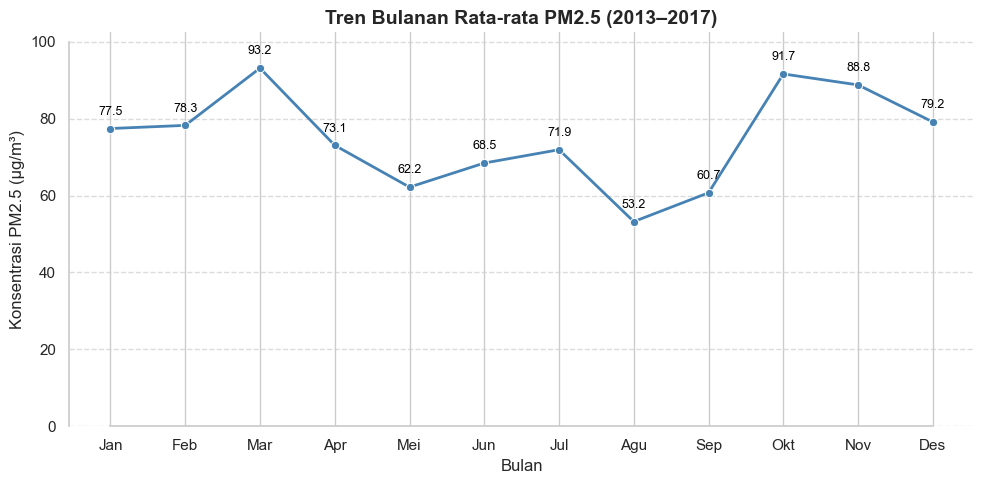

In [67]:
# Hitung rata-rata PM2.5 per bulan
monthly_pm25 = df_2013_2017.groupby('month')['PM2.5'].mean().reset_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_pm25, x='month', y='PM2.5', marker='o', color='steelblue', linewidth=2)

plt.title('Tren Bulanan Rata-rata PM2.5 (2013–2017)', fontsize=14, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_labels)

# y-axis mulai dari nol agar tidak misleading
plt.ylim(0, monthly_pm25['PM2.5'].max() * 1.1)

# Anotasi nilai PM2.5 di atas titik
for idx, row in monthly_pm25.iterrows():
    plt.text(row['month'], row['PM2.5'] + (monthly_pm25['PM2.5'].max() * 0.03), 
             f"{row['PM2.5']:.1f}", ha='center', va='bottom', fontsize=9, color='black')

# Hilangkan grid yang terlalu dominan
sns.despine(trim=True)
plt.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana korelasi antar berbagai polutan (PM2.5, PM10, SO2, NO2, CO, O3)?

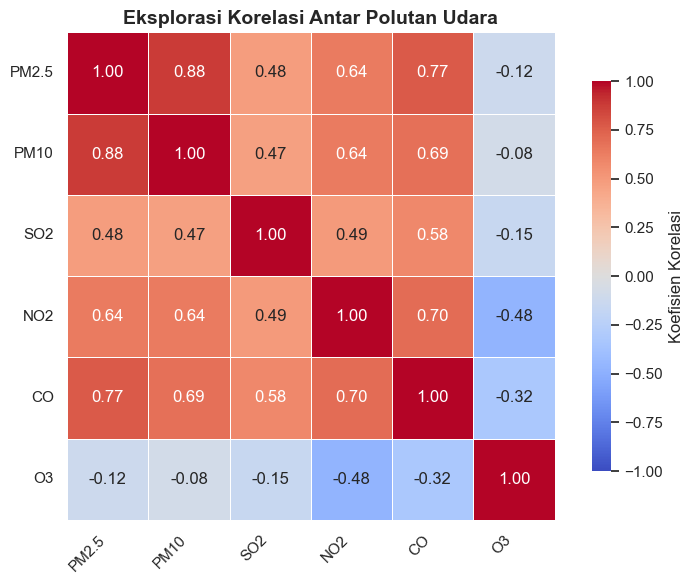

In [68]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Koefisien Korelasi"}
)

plt.title('Eksplorasi Korelasi Antar Polutan Udara', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Hilangkan garis tepi kotak heatmap agar lebih minimalis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagaimana rata-rata tingkat PM2.5 dan PM10 di setiap stasiun dari 2013–2017?

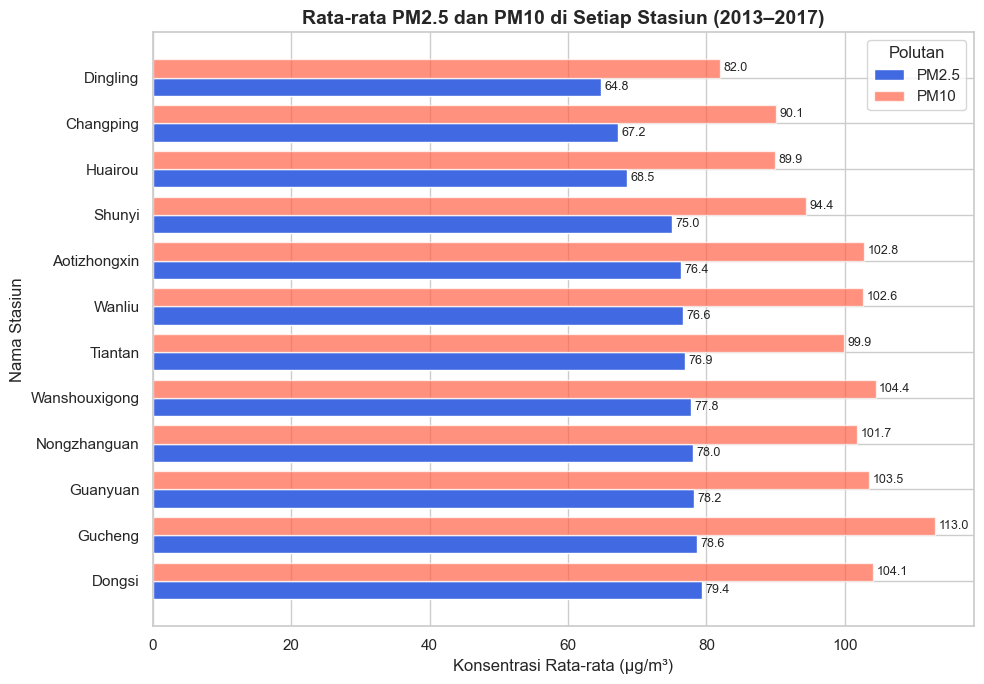

In [69]:
avg_pm_station = df_2013_2017.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()
avg_pm_station = avg_pm_station.sort_values('PM2.5', ascending=False)

plt.figure(figsize=(10, 7))

bar_width = 0.4
indices = np.arange(len(avg_pm_station))

# Barplot PM2.5
plt.barh(indices, avg_pm_station['PM2.5'], height=bar_width, color='royalblue', label='PM2.5')

# Barplot PM10, sedikit bergeser agar tidak tumpang tindih
plt.barh(indices + bar_width, avg_pm_station['PM10'], height=bar_width, color='tomato', alpha=0.7, label='PM10')

plt.yticks(indices + bar_width / 2, avg_pm_station['station'])
plt.xlabel('Konsentrasi Rata-rata (µg/m³)')
plt.ylabel('Nama Stasiun')
plt.title('Rata-rata PM2.5 dan PM10 di Setiap Stasiun (2013–2017)', fontsize=14, weight='bold')

plt.legend(title='Polutan')

# Tambahkan label nilai pada ujung bar
for i in range(len(avg_pm_station)):
    plt.text(avg_pm_station['PM2.5'].iloc[i] + 0.5, i, f"{avg_pm_station['PM2.5'].iloc[i]:.1f}", va='center', fontsize=9)
    plt.text(avg_pm_station['PM10'].iloc[i] + 0.5, i + bar_width, f"{avg_pm_station['PM10'].iloc[i]:.1f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Pertanyaan 4: Apakah terdapat perbedaan signifikan tingkat polusi PM2.5 antara hari kerja dan akhir pekan selama 2013–2017?

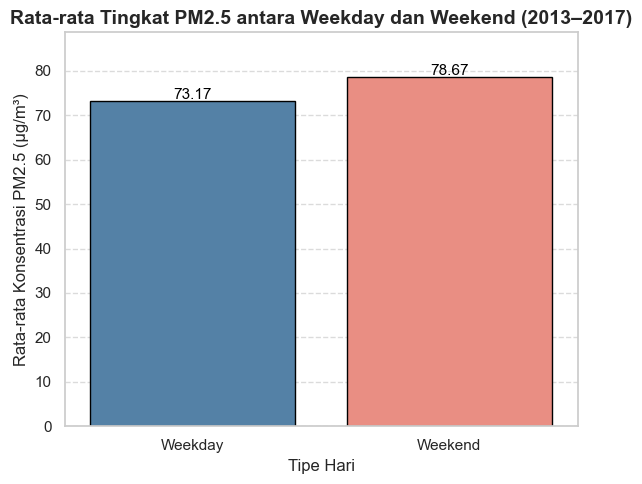

In [70]:
plt.figure(figsize=(6, 5))

sns.barplot(
    data=pm25_daytype,
    x='day_type',
    y='PM2.5',
    hue='day_type',
    palette=['steelblue', 'salmon'],
    edgecolor='black',
    dodge=False,
    legend=False
)

plt.title('Rata-rata Tingkat PM2.5 antara Weekday dan Weekend (2013–2017)', fontsize=14, weight='bold')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.ylim(0, pm25_daytype['PM2.5'].max() + 10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in pm25_daytype.iterrows():
    plt.text(
        index, row['PM2.5'] + 0.5,
        f"{row['PM2.5']:.2f}",
        ha='center',
        fontsize=11,
        color='black'
    )

plt.tight_layout()
plt.show()


### Pertanyaan 5: Bagaimana distribusi level PM2.5 dan PM10 selama jam sibuk (07:00–10:00 dan 17:00–20:00) dibandingkan dengan jam lainnya?

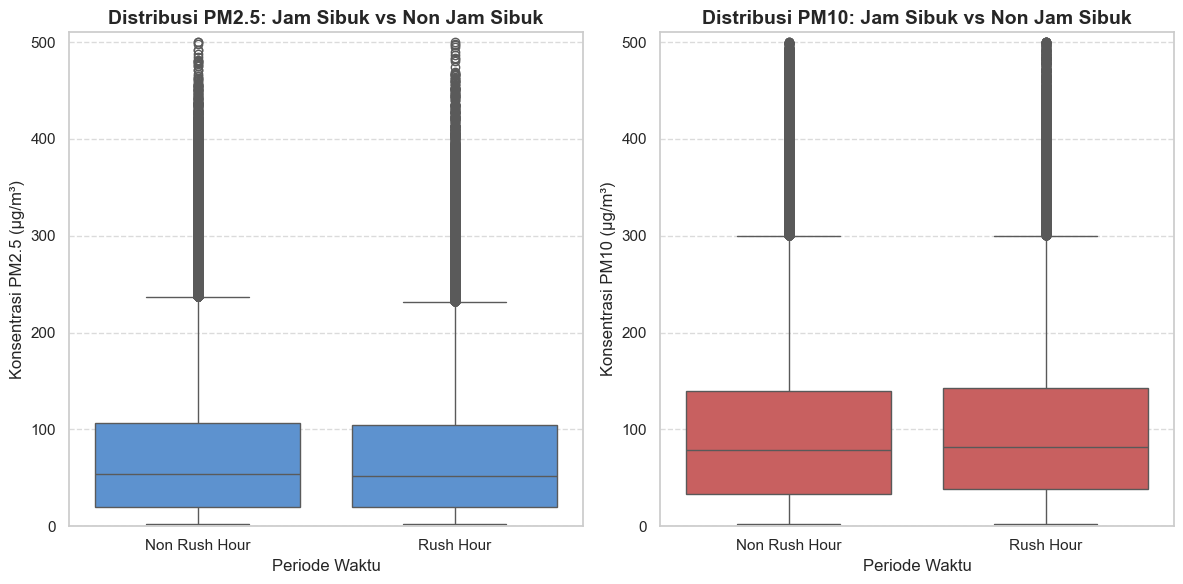

In [71]:
plt.figure(figsize=(12, 6))

# Subplot 1: PM2.5
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_2013_2017,
    x='time_period', y='PM2.5',
    hue='time_period',
    palette=['#4A90E2', '#4A90E2'],
    legend=False
)
plt.title('Distribusi PM2.5: Jam Sibuk vs Non Jam Sibuk', fontsize=14, weight='bold')
plt.xlabel('Periode Waktu', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, df_2013_2017['PM2.5'].max() + 10)

# Subplot 2: PM10
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df_2013_2017,
    x='time_period', y='PM10',
    hue='time_period',
    palette=['#D94F4F', '#D94F4F'],
    legend=False
)
plt.title('Distribusi PM10: Jam Sibuk vs Non Jam Sibuk', fontsize=14, weight='bold')
plt.xlabel('Periode Waktu', fontsize=12)
plt.ylabel('Konsentrasi PM10 (µg/m³)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, df_2013_2017['PM10'].max() + 10)

plt.tight_layout()
plt.show()


**Insight:**

**1. Tren Bulanan PM2.5 Sepanjang Tahun**  
*Pertanyaan Bisnis: Apa tren bulanan polusi PM2.5 sepanjang tahun, dan apakah polusi lebih tinggi di bulan-bulan tertentu?*
- Rata-rata PM2.5 per bulan menunjukkan variasi musiman yang signifikan.
- Nilai tertinggi terjadi pada **Maret (93.16 µg/m³)** dan **Oktober (91.66 µg/m³)**.
- Nilai terendah tercatat di **Agustus (53.24 µg/m³)**.
- Variasi ini menunjukkan kemungkinan pengaruh musim dan aktivitas manusia seperti pemanas saat musim dingin atau pembakaran biomassa.
- Pengendalian kualitas udara sebaiknya difokuskan pada bulan-bulan transisi.

**2. Korelasi Antar Polutan (PM2.5, PM10, SO2, NO2, CO, O3)**  
*Pertanyaan Bisnis: Bagaimana korelasi antar berbagai polutan (PM2.5, PM10, SO2, NO2, CO, O3)?*
* Korelasi Pearson mengungkapkan hubungan kuat antara beberapa polutan:
  - **PM2.5 – PM10**: 0.88
  - **PM2.5 – CO**: 0.77
  - **PM2.5 – NO2**: 0.64
* Sedangkan O3 menunjukkan korelasi negatif, terutama terhadap:
  - **O3 – NO2**: -0.48
  - **O3 – CO**: -0.32
* PM2.5, PM10, CO, dan NO2 kemungkinan berasal dari sumber yang sama (seperti kendaraan).
* O3 perlu ditangani secara terpisah karena sifat kimiawinya yang berbeda (terbentuk melalui reaksi fotokimia di atmosfer).

**3. Rata-rata PM2.5 dan PM10 per Stasiun (2013–2017)**  
*Pertanyaan Bisnis: Bagaimana rata-rata tingkat PM2.5 dan PM10 di setiap stasiun dari 2013–2017?*
- Stasiun dengan rata-rata polusi tertinggi: **Dongsi**, **Gucheng**, dan **Wanshouxigong**.
- Stasiun dengan tingkat polusi lebih rendah: **Dingling** dan **Changping**.
- Konsentrasi polusi lebih tinggi di wilayah urban padat aktivitas.
- Ini menunjukkan perlunya fokus kebijakan pengendalian emisi di area dengan tingkat paparan tinggi.

**4. Perbandingan PM2.5 antara Hari Kerja dan Akhir Pekan**  
*Pertanyaan Bisnis: Apakah terdapat perbedaan signifikan tingkat polusi PM2.5 antara hari kerja dan akhir pekan selama 2013–2017?*

- Rata-rata PM2.5 pada hari kerja: **73.17 µg/m³**
- Rata-rata PM2.5 pada akhir pekan: **78.67 µg/m³**
- Akhir pekan menunjukkan sedikit peningkatan konsentrasi PM2.5.
- Aktivitas rekreasi atau penggunaan kendaraan pribadi mungkin berkontribusi terhadap kenaikan ini.
- Pengawasan kualitas udara sebaiknya mencakup akhir pekan, bukan hanya hari kerja.

**5. Distribusi PM2.5 dan PM10: Jam Sibuk vs Non-Sibuk**  
*Pertanyaan Bisnis: Bagaimana distribusi level PM2.5 dan PM10 selama jam sibuk (07:00–10:00 dan 17:00–20:00) dibandingkan dengan jam lainnya?*
* PM2.5:
  - **Jam sibuk**: 73.68 µg/m³
  - **Non-sibuk**: 75.31 µg/m³
* PM10:
  - **Jam sibuk**: 101.19 µg/m³
  - **Non-sibuk**: 97.93 µg/m³
* PM10 lebih terpengaruh oleh lalu lintas (misalnya, debu jalanan).
* PM2.5 tampak sedikit lebih tinggi pada jam non-sibuk yang kemungkinan akibat akumulasi polusi atau stagnasi atmosfer di malam hari.
* Sumber dan mekanisme polusi berbeda tergantung waktu sehingga strategi penanggulangan perlu mempertimbangkan faktor waktu secara spesifik.


## Analisis Lanjutan Geospatial Analysis dengan Folium

##### Load dan Persiapan Data  

Membaca data CSV, menambahkan kolom `time_period` untuk klasifikasi jam sibuk, dan menggabungkan data koordinat lokasi stasiun.

In [72]:
# Load data
df = pd.read_csv('dashboard/main_data.csv')

# Tambahkan kolom time_period
df['time_period'] = df['hour'].apply(lambda h: 'Rush Hour' if 7 <= h <= 10 or 17 <= h <= 20 else 'Non Rush Hour')

# Tambahkan koordinat lokasi stasiun
station_locations = pd.DataFrame({
    'station': [
        'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
        'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
        'Wanliu', 'Wanshouxigong'
    ],
    'latitude': [
        39.9826, 40.2181, 40.2904, 39.9289, 39.9295,
        39.9145, 40.3749, 39.9375, 40.1270, 39.8731,
        39.9996, 39.8949
    ],
    'longitude': [
        116.3970, 116.2317, 116.2302, 116.4177, 116.3393,
        116.1853, 116.6371, 116.4708, 116.6545, 116.4123,
        116.2785, 116.3466
    ]
})

df = df.merge(station_locations, on='station', how='left')

##### Menambah data lokasi dan Hitung Rata-rata PM2.5 per Stasiun

Menambah data lokasi dan Mengelompokkan data berdasarkan stasiun dan menghitung rata-rata PM2.5 serta mengambil koordinat stasiun untuk pemetaan.

In [73]:
# === Peta Interaktif Rata-rata PM2.5 ===
station_avg = df.groupby('station').agg({
    'PM2.5': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

##### Visualisasi Peta Interaktif
   
Membuat peta dengan Folium dan menambahkan marker lingkaran berwarna berdasarkan kategori PM2.5 (hijau, oranye, merah) pada setiap stasiun.


In [74]:
map_beijing = folium.Map(location=[39.9, 116.4], zoom_start=10, tiles='CartoDB positron')

def pm25_color(pm25):
    if pm25 <= 35:
        return 'green'
    elif pm25 <= 75:
        return 'orange'
    else:
        return 'red'

for _, row in station_avg.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=folium.Popup(
            f"<b>{row['station']}</b><br>Rata-rata PM2.5: {row['PM2.5']:.2f} µg/m³", max_width=250
        ),
        color=pm25_color(row['PM2.5']),
        fill=True,
        fill_color=pm25_color(row['PM2.5']),
        fill_opacity=0.7
    ).add_to(map_beijing)

map_beijing

##### Insight Analysis Lanjutan
Menampilkan sebaran rata-rata konsentrasi PM2.5 per stasiun pemantauan udara di Beijing menggunakan indikator warna:
- **Hijau**: PM2.5 ≤ 35 µg/m³ (Baik)
- **Oranye**: 35 < PM2.5 ≤ 75 µg/m³ (Sedang)
- **Merah**: PM2.5 > 75 µg/m³ (Tinggi/Tidak Sehat)

1. **Stasiun dengan Polusi Tinggi (Merah)**  
   Rata-rata PM2.5 > 75 µg/m³ ditemukan di 9 stasiun berikut:
   - **Shunyi**, **Wanliu**, **Aotizhongxin**, **Guanyuan**, **Gucheng**, **Wanshouxigong**, **Dongsi**, **Nongzhanguan**, **Tiantan**
   > Menunjukkan wilayah-wilayah ini memiliki kualitas udara **buruk secara konsisten**, terutama di pusat kota dan area padat aktivitas.

2. **Stasiun dengan Polusi Sedang (Oranye)**  
   Rata-rata PM2.5 antara 35–75 µg/m³:
   - **Dingling**, **Changping**, **Huairou**
   > Lokasi ini cenderung berada di **wilayah pinggiran**, dengan kualitas udara yang relatif lebih baik namun masih belum ideal.

3. **Tidak Ada Stasiun dengan Udara Bersih (Hijau)**  
   - **Tidak ditemukan stasiun dengan PM2.5 ≤ 35 µg/m³**
   > Mengindikasikan **tidak ada area di Beijing yang benar-benar aman dari polusi** PM2.5 berdasarkan data rata-rata per stasiun.

**Informasi Hasil**
- **Polusi udara parah terkonsentrasi di wilayah urban dan pusat kota**.
- **Wilayah pinggiran masih belum mencapai kategori kualitas udara “baik”**, meskipun relatif lebih rendah tingkat polusinya.
- **Tidak adanya stasiun hijau** menunjukkan bahwa **pengendalian kualitas udara harus dilakukan secara menyeluruh**, tidak hanya di pusat kota tetapi juga di wilayah sekitarnya.

## Conclusion

##### 1. Tren Bulanan Polusi PM2.5 Sepanjang Tahun  
Analisis menunjukkan bahwa polusi PM2.5 mengalami variasi musiman yang signifikan sepanjang tahun. Bulan Maret dan Oktober mencatat konsentrasi PM2.5 tertinggi sedangkan Agustus merupakan bulan dengan tingkat polusi terendah. Kondisi ini kemungkinan besar dipengaruhi oleh perubahan musim dan aktivitas manusia, seperti penggunaan pemanas di musim dingin dan pembakaran biomassa. Selain itu, analisis musiman menegaskan bahwa kualitas udara cenderung memburuk pada musim dingin dengan rata-rata PM2.5 yang lebih tinggi dibanding musim panas yang cenderung lebih bersih. Oleh karena itu, upaya pengendalian kualitas udara sebaiknya difokuskan pada bulan-bulan transisi dan musim dingin untuk mengurangi paparan polutan.

##### 2. Korelasi Antar Polutan  
Hasil korelasi antar polutan mengungkapkan hubungan yang kuat antara PM2.5, PM10, CO, dan NO2, yang menunjukkan bahwa polutan-polutan ini kemungkinan besar berasal dari sumber yang sama, seperti emisi kendaraan bermotor dan pembakaran bahan bakar fosil. Sebaliknya, ozon (O3) menunjukkan korelasi negatif terhadap beberapa polutan utama yang mencerminkan karakteristik pembentukan ozon yang berbeda melalui proses fotokimia di atmosfer. Hal ini menandakan bahwa strategi pengendalian polusi harus mempertimbangkan sifat kimia dan sumber polutan secara spesifik, terutama untuk menangani O3 secara terpisah dari polutan partikulat.

##### 3. Rata-rata Tingkat PM2.5 dan PM10 per Stasiun  
Perbedaan tingkat polusi antara stasiun pemantauan sangat mencolok pada stasiun-stasiun di area urban padat seperti Dongsi, Gucheng, dan Wanshouxigong mencatat konsentrasi PM2.5 dan PM10 yang jauh lebih tinggi dibandingkan stasiun di area pinggiran seperti Dingling dan Changping. Hal ini menunjukkan adanya konsentrasi polutan yang lebih besar di wilayah dengan aktivitas manusia yang intensif. Selain itu, tren menurun pada nilai maksimum PM2.5 setelah tahun 2015 menunjukkan bahwa kebijakan pengendalian polusi mungkin sudah mulai memberikan efek positif, meskipun level polusi masih jauh di atas ambang aman.

##### 4. Perbedaan Tingkat Polusi PM2.5 antara Hari Kerja dan Akhir Pekan  
Analisis menunjukkan bahwa konsentrasi PM2.5 pada akhir pekan sedikit lebih tinggi dibandingkan hari kerja. Perbedaan ini mungkin disebabkan oleh peningkatan aktivitas rekreasi dan penggunaan kendaraan pribadi pada akhir pekan yang dapat menambah beban polusi udara. Meskipun selisihnya tidak terlalu besar, hal ini menandakan pentingnya pengawasan kualitas udara yang tidak hanya terbatas pada hari kerja tetapi juga perlu diperluas hingga akhir pekan untuk mendapatkan gambaran kualitas udara yang lebih komprehensif.

##### 5. Distribusi PM2.5 dan PM10 Selama Jam Sibuk dan Non-Sibuk  
Distribusi PM2.5 dan PM10 berdasarkan waktu menunjukkan pola yang berbeda untuk masing-masing polutan. PM10 cenderung lebih tinggi pada jam sibuk yang kemungkinan terkait dengan aktivitas lalu lintas dan peningkatan debu jalanan selama periode tersebut. Sebaliknya, PM2.5 sedikit lebih tinggi pada jam non-sibuk, yang dapat disebabkan oleh akumulasi polutan dan kondisi atmosfer yang kurang dinamis pada malam hari. Perbedaan pola ini menegaskan bahwa sumber dan mekanisme polusi berbeda sepanjang hari sehingga strategi pengendalian perlu mempertimbangkan faktor waktu agar efektif.


### Tambahan Informasi 
Analisis ini juga memperlihatkan bahwa suhu ekstrem mempengaruhi konsentrasi PM2.5, di mana suhu rendah ekstrem terkait dengan konsentrasi PM2.5 yang lebih tinggi dibanding suhu tinggi ekstrem. Hal ini mungkin disebabkan oleh inversi suhu yang menghambat penyebaran polutan dan peningkatan penggunaan pemanas. Tren tahunan juga menunjukkan adanya penurunan konsentrasi PM2.5 dari 2014 hingga 2016, dengan sedikit kenaikan pada 2017 yang menandakan perlunya tindakan pengendalian polusi yang berkelanjutan serta pemantauan rutin.